Shape of inputs =  (784, 1000)
Shape of labels =  (10, 1000)
One-hot encoded label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
m = 1000
Final Loss =  0.38990216072696
Final Accuracy =  0.313
Final Test Loss = 0.45855454267390694
Final Test Accuracy = 0.312


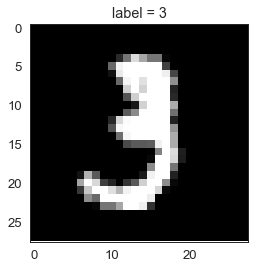

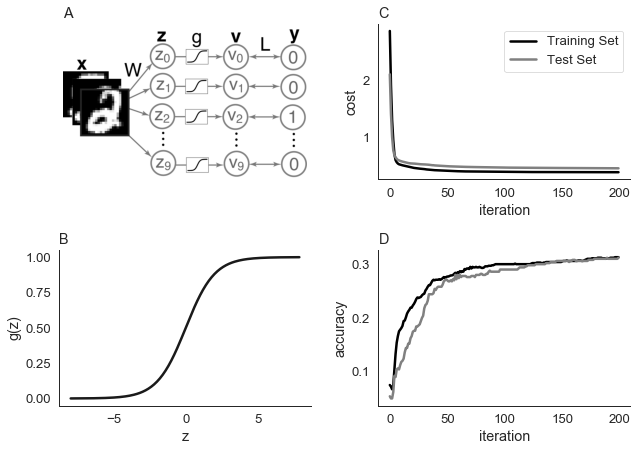

In [259]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(6)

# Learning rate
epsilon=.001

# Number of grad descent iterations
NumIterations=200

# Load data
data = np.load('./MNISTdata.npz',allow_pickle=True)
X=data['X']
Y=data['Y']
XTest=data['XTest']
YTest=data['YTest']

print('Shape of inputs = ',X.shape)
print('Shape of labels = ',Y.shape)

# Display an image from the data set
i=10
plt.figure()
plt.imshow(X[:,i].reshape(28,28),cmap='gray')  
plt.title('label = %d'%np.argmax(Y[:,i]))
print('One-hot encoded label:',Y[:,i])


# Initialize W
W=np.random.randn(10,28*28)/np.sqrt(28*28*10)


# Import logistic sigmoid activation function
from scipy.special import expit as LogisticSigmoid

def g(x):
    return LogisticSigmoid(x)

# Derivative of logistic sigmoid
def gprime(x):
    return g(x)*(1-g(x))


# Initialize vector of losses
Loss=np.zeros(NumIterations)
Accuracy=np.zeros(NumIterations)
TestLoss=np.zeros(NumIterations)
TestAccuracy=np.zeros(NumIterations)

# Get the size of the data set
m=np.shape(X)[1]

# Get the actua digits from the one-hot encoded labels
ActualDigits=np.argmax(Y,axis=0)
TestActualDigits=np.argmax(YTest,axis=0)

for j in range(NumIterations):    
    Z=W@X
    V=g(Z)
    Loss[j]=(1/2)*np.mean(np.sum((V-Y)**2,axis=0))    
    DeltaW=-(epsilon/m)*((V-Y)*gprime(Z))@(X.T)
    W=W+DeltaW

    Guesses=np.argmax(V,axis=0)
    Correct=(Guesses==ActualDigits)
    Accuracy[j]=np.mean(Correct)
    
    VTest=g(W@XTest)
    TestLoss[j]=(1/2)*np.mean(np.sum((VTest-YTest)**2,axis=0))    
    TestGuesses=np.argmax(VTest,axis=0)
    TestCorrect=(TestGuesses==TestActualDigits)
    TestAccuracy[j]=np.mean(TestCorrect)

    
print('Final Loss = ',Loss[-1])
print('Final Accuracy = ',Accuracy[-1])
print('Final Test Loss =',TestLoss[-1])
print('Final Test Accuracy =',TestAccuracy[-1])    
    

    
# Make figure
plt.subplots(figsize=(9,6.5))

plt.subplot(2,2,1)
im = plt.imread('PerceptronDiagram.png')
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')
sns.despine()

plt.subplot(2,2,3)
zplot=np.arange(-8,8,.1)
plt.plot(zplot,g(zplot),'k')
plt.ylabel('g(z)')
plt.xlabel('z')
plt.title('B',loc='left')
sns.despine()


plt.subplot(2,2,2)
plt.plot(Loss,color='black',label='Training Set')
plt.plot(TestLoss,color='gray',label='Test Set')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,2,4)
plt.plot(Accuracy,color='black')
plt.plot(TestAccuracy,color='gray')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('D',loc='left')
sns.despine()

plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/Perceptron.pdf')

        
